[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

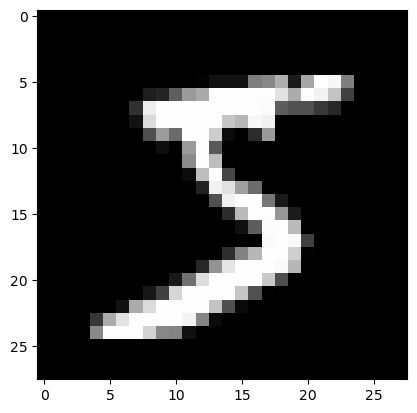

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import svm

from keras.datasets import mnist

# 손글씨 이미지 데이터셋 784 x 1짜리 벡터로 변환 
# = 28 x 28 pixel로 이루어진 손글씨 이미지
((x_train, y_train), (x_test, y_test)) = mnist.load_data()
 #print(x_train[0,0:28,0:28])
#plt.figure()
plt.imshow(x_train[0,0:28, 0:28], cmap = 'gray')

# 원래 28 x 28 행렬이 60000장 들어 있는 건데 이걸 
# 벡터로 바꿔서 1행이 한 장    
X_train = x_train.reshape(60000, 28*28)
X_test = x_test.reshape(10000, 28*28)

#print(X_train[0,:])
#print(X_test[0:,])


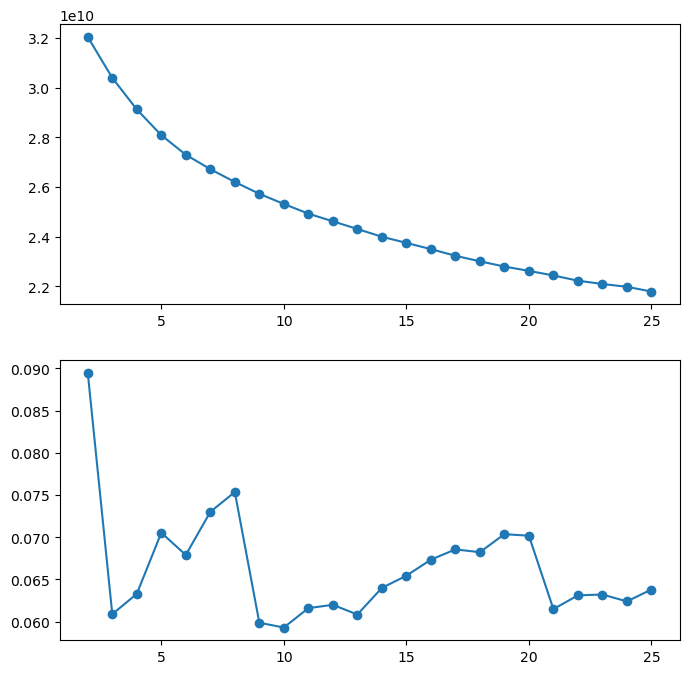

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

max_cluster = 25

score_inertia = np.full(max_cluster + 1, np.nan)
score_silhouette = np.full(max_cluster + 1, np.nan)

for n_cluster in range(2, max_cluster + 1):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0).fit(X_test)
    score_inertia[n_cluster] = kmeans.inertia_
    score_silhouette[n_cluster] = silhouette_score(X_test, kmeans.labels_)
        
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(score_inertia,'o-')
plt.subplot(2,1,2)
plt.plot(score_silhouette,'o-')

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score

model_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 1000, min_samples_leaf = 1000)
# 설정해준것
model_tree.fit(X_train, y_train)

y_tree_train = model_tree.predict(X_train)
y_tree_test = model_tree.predict(X_test)

print( 'train %.4f, test %.4f' % (accuracy_score(y_tree_train, y_train), accuracy_score(y_tree_test, y_test)) )

train 0.6691, test 0.6740


In [8]:
# decision tree를 시각화
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

ensemble 1: train 0.5386, test 0.5507
ensemble 2: train 0.6350, test 0.6444
ensemble 5: train 0.7479, test 0.7569
ensemble 10: train 0.7925, test 0.7918
ensemble 20: train 0.8206, test 0.8248
ensemble 50: train 0.8497, test 0.8528
ensemble 100: train 0.8475, test 0.8517


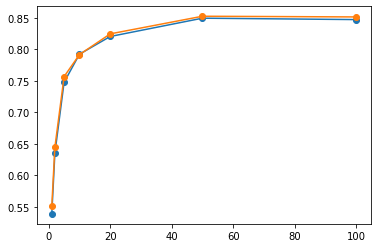

In [12]:
from sklearn.ensemble import RandomForestClassifier

# 우리가 사용한 decision tree 개수 = numlist_ensemble
numlist_ensemble = np.array([1, 2, 5, 10, 20, 50, 100])
accuracy_train = []
accuracy_test = []

for num_ensemble in numlist_ensemble:
    model_rdf = RandomForestClassifier(n_estimators = num_ensemble, max_depth = 10, min_samples_split = 1000, min_samples_leaf = 1000)
    model_rdf.fit(X_train, y_train)

    y_rdf_train = model_rdf.predict(X_train)
    y_rdf_test = model_rdf.predict(X_test)

    print( 'ensemble %d: train %.4f, test %.4f' % (num_ensemble, accuracy_score(y_rdf_train, y_train), accuracy_score(y_rdf_test, y_test)) )

    accuracy_train.append(accuracy_score(y_rdf_train, y_train))
    accuracy_test.append(accuracy_score(y_rdf_test, y_test))
    
plt.figure()
plt.plot(numlist_ensemble, accuracy_train, 'o-')
plt.plot(numlist_ensemble ,accuracy_test, 'o-')